INSTALL DEPENDENCES

In [1]:
!pip3 install openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 372.1/372.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 23.3 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 19.0 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/open-mmlab/mmsegmentation.git
%cd mmsegmentation
!git checkout main
!pip install -e .

Cloning into 'mmsegmentation'...
remote: Enumerating objects: 14947, done.
remote: Counting objects: 100% (525/525), done.
remote: Compressing objects: 100% (348/348), done.
remote: Total 14947 (delta 192), reused 350 (delta 160), pack-reused 14422
Receiving objects: 100% (14947/14947), 20.63 MiB | 23.52 MiB/s, done.
Resolving deltas: 100% (10491/10491), done.
/content/mmsegmentation
Already on 'main'
Your branch is up to date with 'origin/main'.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/mmsegmentation
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmsegmentation


In [3]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [4]:
# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMSegmentation installation
import mmseg
print(mmseg.__version__)

2.0.0+cu118 True
1.0.0


In [11]:
%cd ..

/content


SETTING UP DATASET

In [7]:
!ls

CITATION.cff  docs	   mmsegmentation.egg-info  README_zh-CN.md   setup.cfg
configs       LICENSE	   model-index.yml	    requirements      setup.py
demo	      MANIFEST.in  projects		    requirements.txt  tests
docker	      mmseg	   README.md		    resources	      tools


In [12]:
import os 

if os.path.exists("/content/dataset/img_dir/ISIC2018_Task1-2_Training_Input") == False:
    !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1-2_Training_Input.zip
    !unzip /content/ISIC2018_Task1-2_Training_Input.zip
    !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1-2_Test_Input.zip
    !unzip /content/ISIC2018_Task1-2_Test_Input.zip
    !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1_Test_GroundTruth.zip
    !unzip /content/ISIC2018_Task1_Test_GroundTruth.zip
    !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1_Training_GroundTruth.zip
    !unzip /content/ISIC2018_Task1_Training_GroundTruth.zip
    !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1-2_Validation_Input.zip
    !unzip ISIC2018_Task1-2_Validation_Input.zip
    !wget https://isic-challenge-data.s3.amazonaws.com/2018/ISIC2018_Task1_Validation_GroundTruth.zip
    !unzip ISIC2018_Task1_Validation_GroundTruth.zip

Streaming output truncated to the last 5000 lines.
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0015582.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0015593.jpg  
 extracting: ISIC2018_Task1-2_Training_Input/ISIC_0015603.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0015607.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0015614.jpg  
 extracting: ISIC2018_Task1-2_Training_Input/ISIC_0015617.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0015625.jpg  
 extracting: ISIC2018_Task1-2_Training_Input/ISIC_0015627.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0015631.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0015636.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0015638.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0015641.jpg  
 extracting: ISIC2018_Task1-2_Training_Input/ISIC_0015645.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_0015936.jpg  
  inflating: ISIC2018_Task1-2_Training_Input/ISIC_001

In [13]:
!rm ISIC2018_Task1-2_Test_Input.zip ISIC2018_Task1-2_Training_Input.zip ISIC2018_Task1_Test_GroundTruth.zip  ISIC2018_Task1_Training_GroundTruth.zip ISIC2018_Task1_Validation_GroundTruth.zip ISIC2018_Task1-2_Validation_Input.zip
!mkdir dataset
%cd dataset
!mkdir images
!mkdir groundTruth
%cd /content
!mv /content/ISIC2018_Task1-2_Training_Input /content/dataset/images
!mv /content/ISIC2018_Task1-2_Test_Input /content/dataset/images

!mv /content/ISIC2018_Task1_Training_GroundTruth /content/dataset/groundTruth
!mv /content/ISIC2018_Task1_Test_GroundTruth /content/dataset/groundTruth

!mv ISIC2018_Task1-2_Validation_Input /content/dataset/images
!mv ISIC2018_Task1_Validation_GroundTruth /content/dataset/groundTruth

/content/dataset
/content


<Figure size 1500x1000 with 0 Axes>

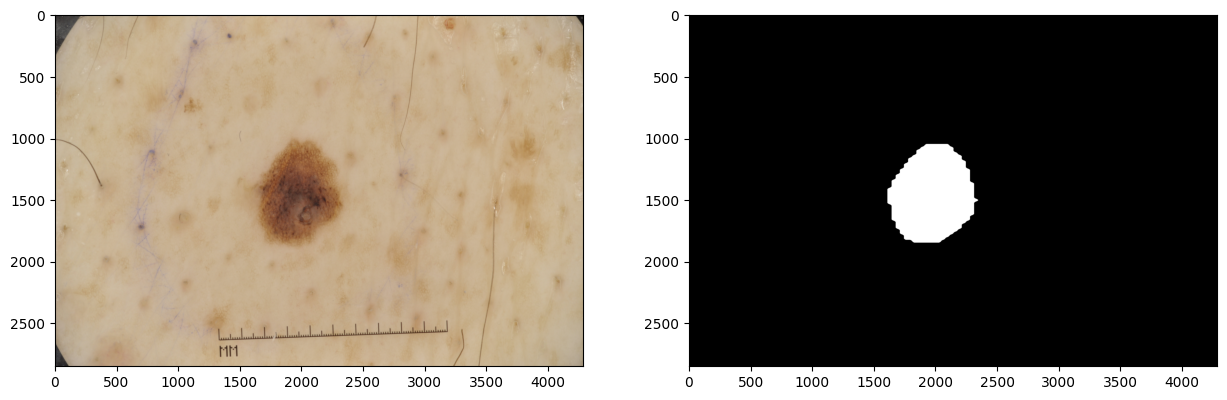

In [14]:
# Let's take a look at the dataset
import mmcv
import matplotlib.pyplot as plt

img = mmcv.imread('dataset/images/ISIC2018_Task1-2_Test_Input/ISIC_0012236.jpg')
img1 = mmcv.imread('dataset/groundTruth/ISIC2018_Task1_Test_GroundTruth/ISIC_0012236_segmentation.png')

plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(1,2,figsize=(15, 15))
ax[0].imshow(mmcv.bgr2rgb(img))
ax[1].imshow(mmcv.bgr2rgb(img1))

plt.show()

In [15]:
from mmseg.registry import DATASETS
from mmseg.datasets import BaseSegDataset
classes = ['normal', 'abnormal']
palette = [[0, 0, 0], [255, 255, 255]]
@DATASETS.register_module()
class ISICDATASET_(BaseSegDataset):
    METAINFO = dict(
        classes=('normal', 'abnormal'),
        palette=[[0, 0, 0], [255, 255, 255]])

    def __init__(self, **kwargs):
        super().__init__(img_suffix='.jpg', seg_map_suffix='_segmentation.png', 
                    **kwargs)
  

In [16]:
%cd mmsegmentation


/content/mmsegmentation


In [17]:
!ls

CITATION.cff  docs	   mmsegmentation.egg-info  README_zh-CN.md   setup.cfg
configs       LICENSE	   model-index.yml	    requirements      setup.py
demo	      MANIFEST.in  projects		    requirements.txt  tests
docker	      mmseg	   README.md		    resources	      tools


CONFIGS

In [18]:
from mmengine.config import Config
cfg = Config.fromfile('configs/ocrnet/ocrnet_hr18s_4xb2-40k_cityscapes-512x1024.py')
print(f'Config:\n{cfg.pretty_text}')

Config:
norm_cfg = dict(type='SyncBN', requires_grad=True)
data_preprocessor = dict(
    type='SegDataPreProcessor',
    mean=[123.675, 116.28, 103.53],
    std=[58.395, 57.12, 57.375],
    bgr_to_rgb=True,
    pad_val=0,
    seg_pad_val=255,
    size=(512, 1024))
model = dict(
    type='CascadeEncoderDecoder',
    data_preprocessor=dict(
        type='SegDataPreProcessor',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        bgr_to_rgb=True,
        pad_val=0,
        seg_pad_val=255,
        size=(512, 1024)),
    num_stages=2,
    pretrained='open-mmlab://msra/hrnetv2_w18_small',
    backbone=dict(
        type='HRNet',
        norm_cfg=dict(type='SyncBN', requires_grad=True),
        norm_eval=False,
        extra=dict(
            stage1=dict(
                num_modules=1,
                num_branches=1,
                block='BOTTLENECK',
                num_blocks=(2, ),
                num_channels=(64, )),
            stage2=dict(
             

In [36]:
#Define num of class
cfg.model.decode_head[0].num_classes = 2
cfg.model.decode_head[1].num_classes = 2
#Define batch norm
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head[0].norm_cfg = cfg.norm_cfg
cfg.model.decode_head[1].norm_cfg  = cfg.norm_cfg
# Modify dataset type and path
cfg.dataset_type = 'ISICDATASET_'
cfg.data_root = '/content/dataset'
cfg.train_dataloader.dataset.type = 'ISICDATASET_'
cfg.train_dataloader.dataset.data_root = '/content/dataset'
cfg.train_dataloader.dataset.data_prefix = dict(img_path='images/ISIC2018_Task1-2_Training_Input', seg_map_path='groundTruth/ISIC2018_Task1_Training_GroundTruth')
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline

cfg.val_dataloader.dataset.type = 'ISICDATASET_'
cfg.val_dataloader.dataset.data_root = '/content/dataset'
cfg.val_dataloader.dataset.data_prefix = dict(img_path='images/ISIC2018_Task1-2_Validation_Input', seg_map_path='groundTruth/ISIC2018_Task1_Validation_GroundTruth')
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline


cfg.test_dataloader.dataset.type = 'ISICDATASET_'


cfg.test_dataloader.num_workers = 2
cfg.test_dataloader.batch_size = 1

cfg.test_dataloader.dataset.data_root = '/content/dataset'
cfg.test_dataloader.dataset.data_prefix = dict(img_path='images/ISIC2018_Task1-2_Test_Input', seg_map_path='groundTruth/ISIC2018_Task1_Test_GroundTruth')
cfg.test_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.test_evaluator = dict(
    type='IoUMetric',
    iou_metrics=['mIoU'],
    format_only=False,
    output_dir='work_dirs/format_results'
)
#  the number of samples and workers per GPU 

cfg.train_dataloader.batch_size = 4
cfg.train_dataloader.num_workers = 1

cfg.work_dir = './work_dirs/final'
cfg.train_cfg = dict(
    type='EpochBasedTrainLoop', max_epochs=5, val_begin=1, val_interval=1)


cfg.param_scheduler = [
    dict(type='LinearLR', by_epoch=False, start_factor=0.1, begin=0, end=200),
    dict(
        type='PolyLR',
        eta_min=0.0001,
        power=0.9,
        begin=0,
        end=160,
        by_epoch=False)
]
cfg.default_hooks = dict(
    timer=dict(type='IterTimerHook'),
    logger=dict(type='LoggerHook', interval=50, log_metric_by_epoch=False),
    param_scheduler=dict(type='ParamSchedulerHook'),
    checkpoint=dict(type='CheckpointHook', interval = 1000, by_epoch=False),
    sampler_seed=dict(type='DistSamplerSeedHook'))

cfg.log_processor = dict(by_epoch=True)
cfg['randomness'] = dict(seed=32)
cfg.dump('/content/mmsegmentation/configs/ocrnet/ocrnet_khanh.py')

#Load pretrain model 
cfg.load_from = "https://download.openmmlab.com/mmsegmentation/v0.5/ocrnet/ocrnet_hr18s_4xb2-40k_cityscapes-512x1024/ocrnet_hr18s_4xb2-40k_cityscapes-512x1024_20230227_145026-6c052a14.pth"


In [20]:
from mmengine.runner import Runner

runner = Runner.from_cfg(cfg)


05/10 12:25:04 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 32
    GPU 0: Tesla V100-SXM2-16GB
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=comput

/content/mmsegmentation/mmseg/models/backbones/hrnet.py:318: UserWarning: DeprecationWarning: pretrained is deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is deprecated, '
/content/mmsegmentation/mmseg/models/decode_heads/decode_head.py:120: UserWarning: For binary segmentation, we suggest using`out_channels = 1` to define the outputchannels of segmentor, and use `threshold`to convert `seg_logits` into a predictionapplying a threshold
  warnings.warn('For binary segmentation, we suggest using'
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTo

05/10 12:25:11 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
05/10 12:25:11 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

In [21]:
runner.train()

05/10 12:25:12 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
05/10 12:25:12 - mmengine - INFO - load model from: open-mmlab://msra/hrnetv2_w18_small
05/10 12:25:12 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://msra/hrnetv2_w18_small


Downloading: "https://download.openmmlab.com/pretrain/third_party/hrnetv2_w18_small-b5a04e21.pth" to /root/.cache/torch/hub/checkpoints/hrnetv2_w18_small-b5a04e21.pth


05/10 12:26:01 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: incre_modules.0.0.conv1.weight, incre_modules.0.0.bn1.weight, incre_modules.0.0.bn1.bias, incre_modules.0.0.bn1.running_mean, incre_modules.0.0.bn1.running_var, incre_modules.0.0.bn1.num_batches_tracked, incre_modules.0.0.conv2.weight, incre_modules.0.0.bn2.weight, incre_modules.0.0.bn2.bias, incre_modules.0.0.bn2.running_mean, incre_modules.0.0.bn2.running_var, incre_modules.0.0.bn2.num_batches_tracked, incre_modules.0.0.conv3.weight, incre_modules.0.0.bn3.weight, incre_modules.0.0.bn3.bias, incre_modules.0.0.bn3.running_mean, incre_modules.0.0.bn3.running_var, incre_modules.0.0.bn3.num_batches_tracked, incre_modules.0.0.downsample.0.weight, incre_modules.0.0.downsample.1.weight, incre_modules.0.0.downsample.1.bias, incre_modules.0.0.downsample.1.running_mean, incre_modules.0.0.downsample.1.running_var, incre_modules.0.0.downsample.1.num_batches_tracked, inc

Downloading: "https://download.openmmlab.com/mmsegmentation/v0.5/ocrnet/ocrnet_hr18s_4xb2-40k_cityscapes-512x1024/ocrnet_hr18s_4xb2-40k_cityscapes-512x1024_20230227_145026-6c052a14.pth" to /root/.cache/torch/hub/checkpoints/ocrnet_hr18s_4xb2-40k_cityscapes-512x1024_20230227_145026-6c052a14.pth


The model and loaded state dict do not match exactly

size mismatch for decode_head.0.conv_seg.weight: copying a param with shape torch.Size([19, 270, 1, 1]) from checkpoint, the shape in current model is torch.Size([2, 270, 1, 1]).
size mismatch for decode_head.0.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is torch.Size([2]).
size mismatch for decode_head.1.conv_seg.weight: copying a param with shape torch.Size([19, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([2, 512, 1, 1]).
size mismatch for decode_head.1.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is torch.Size([2]).
05/10 12:26:03 - mmengine - INFO - Load checkpoint from https://download.openmmlab.com/mmsegmentation/v0.5/ocrnet/ocrnet_hr18s_4xb2-40k_cityscapes-512x1024/ocrnet_hr18s_4xb2-40k_cityscapes-512x1024_20230227_145026-6c052a14.pth
05/10 12:26:03 - mmengine - WARNING - "FileClient" 

KeyboardInterrupt: ignored

In [37]:
cfg = Config.fromfile('/content/mmsegmentation/configs/ocrnet/ocrnet_khanh.py')
checkpoint_path = '/content/mmsegmentation/work_dirs/tutorial/iter_1000.pth'
cfg.model.pretrained = checkpoint_path  # set the path of the checkpoint


In [38]:
runner_1 = Runner.from_cfg(cfg)


05/10 14:12:37 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.11 (main, Apr  5 2023, 14:15:10) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 32
    GPU 0: Tesla V100-SXM2-16GB
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 2.0.0+cu118
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.8
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=comput

/usr/local/lib/python3.10/dist-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(


05/10 14:12:38 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
05/10 14:12:38 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/content/mmsegmentation/mmseg/models/backbones/hrnet.py:318: UserWarning: DeprecationWarning: pretrained is deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is deprecated, '
/content/mmsegmentation/mmseg/models/decode_heads/decode_head.py:120: UserWarning: For binary segmentation, we suggest using`out_channels = 1` to define the outputchannels of segmentor, and use `threshold`to convert `seg_logits` into a predictionapplying a threshold
  warnings.warn('For binary segmentation, we suggest using'
/content/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/content/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTo

In [39]:
runner.test()

05/10 14:13:11 - mmengine - INFO - Epoch(test) [  50/1000]    eta: 0:05:03  time: 0.6344  data_time: 0.0480  memory: 1663  
05/10 14:13:45 - mmengine - INFO - Epoch(test) [ 100/1000]    eta: 0:07:27  time: 0.6941  data_time: 0.0470  memory: 1683  
05/10 14:14:03 - mmengine - INFO - Epoch(test) [ 150/1000]    eta: 0:06:22  time: 0.0602  data_time: 0.0028  memory: 1663  
05/10 14:14:06 - mmengine - INFO - Epoch(test) [ 200/1000]    eta: 0:04:41  time: 0.0597  data_time: 0.0027  memory: 1290  
05/10 14:14:09 - mmengine - INFO - Epoch(test) [ 250/1000]    eta: 0:03:40  time: 0.0672  data_time: 0.0030  memory: 1290  
05/10 14:14:12 - mmengine - INFO - Epoch(test) [ 300/1000]    eta: 0:02:59  time: 0.0616  data_time: 0.0029  memory: 1290  
05/10 14:14:15 - mmengine - INFO - Epoch(test) [ 350/1000]    eta: 0:02:28  time: 0.0623  data_time: 0.0029  memory: 1290  
05/10 14:14:18 - mmengine - INFO - Epoch(test) [ 400/1000]    eta: 0:02:04  time: 0.0605  data_time: 0.0028  memory: 1290  
05/10 14

{}

In [29]:

from mmseg.apis import init_model, inference_model, show_result_pyplot

config_path = '/content/mmsegmentation/configs/ocrnet/ocrnet_khanh.py'
checkpoint_path = '/content/mmsegmentation/work_dirs/final/iter_4000.pth'
img_path = '/content/dataset/images/ISIC2018_Task1-2_Test_Input/ISIC_0015092.jpg'



# build the model from a config file and a checkpoint file
model = init_model(config_path, checkpoint_path, device='cuda:0')

# inference on given image
result = inference_model(model, img_path)


# save the visualization result, the output image would be found at the path `work_dirs/result.png`
result = show_result_pyplot(model, img_path, result, out_file='work_dirs/result.png')


Loads checkpoint by local backend from path: /content/mmsegmentation/work_dirs/final/iter_4000.pth
05/10 13:55:39 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


<Figure size 1500x1000 with 0 Axes>

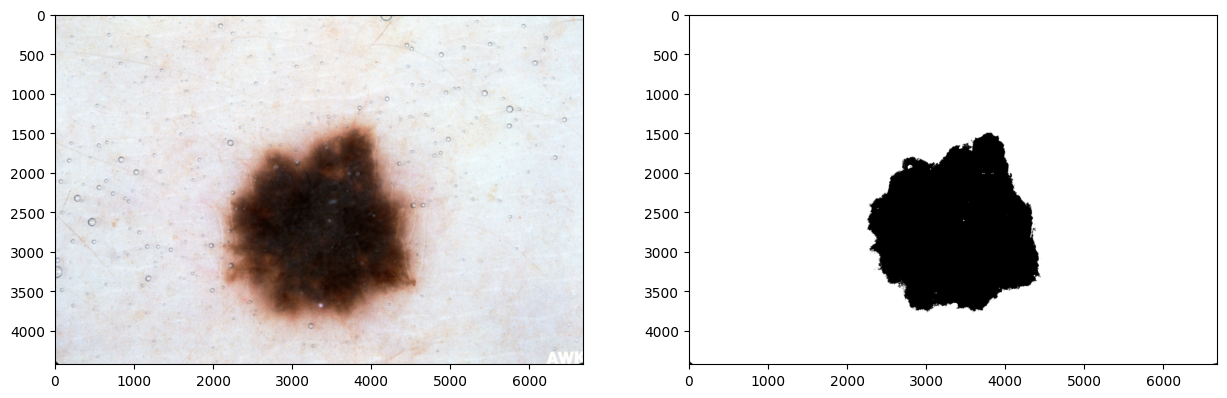

In [31]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img = Image.open('work_dirs/result.png')
img_real = Image.open('/content/dataset/images/ISIC2018_Task1-2_Test_Input/ISIC_0015092.jpg')
gray_img = np.array(img.convert('L'))

# Apply a threshold to the pixel values to create a binary mask
threshold = 40
binary_mask = (gray_img > threshold).astype(np.uint8)

plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(1,2,figsize=(15, 15))
ax[0].imshow(img_real)
ax[1].imshow(binary_mask, cmap='gray')

plt.show()